# Data Analysis
## Dimensionality Reduction and Factor Analysis


## Nikolas Naydenov

The main topic of of this project is data analysis. More specifically, the aim is to understand and apply in practice traditional data transformation and dimensionality reduction techniques, namely the linear methods Principal Component Analysis, Linear Discriminant Analysis.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

## Principal Component Analysis

The main purpose of principal component analysis (PCA) is to reduce the
dimensionality from p to d, where d < p, while at the same time accounting
for as much of the variation in the original data set as possible. With PCA, we
transform the data to a new set of coordinates or variables that are a linear
combination of the original variables. In addition, the observations in the
new principal component space are uncorrelated [1].

### Dataset
We generate 150 samples, of 6-dimensional normally distributed random variables that have high variance in some dimensions (e.g. 2) and low variance in other dimensions (e.g. 4).

That way we simulate a dataset where features have different scale.

In [ ]:
# Generate x1: standard normal distribution of (150 samples, 2 features) with high variance - scaled by 100
x1 = np.random.randn(150, 2) * 100
print(x1[0])

[-72.17375533  17.68208721]


In [ ]:
# Generate x2: 150 samples, 4 features with standard normal variance
x2 = np.random.randn(150, 4)
print(x2[0])

[ 1.90119069 -0.06066081 -0.70840677 -1.51371439]


In [ ]:
# Concatenate x1 and x2 horizontally to form X: 150 samples, 6 features
X = np.hstack((x1, x2))
#print(type(X))
#print(X[:,0])

# Print X with values rounded to 0.01 precision for readability
np.set_printoptions(precision=2, suppress=True)
print(X[0:5]) # print(X[0,:])

[[ -72.17   17.68    1.9    -0.06   -0.71   -1.51]
 [ -54.67  -27.17   -1.8    -1.58    0.27    0.51]
 [ 167.35  134.05   -1.58    0.9    -0.48    0.15]
 [-129.96   82.97    1.61    0.9    -0.27   -0.89]
 [  81.14 -114.83   -2.15   -0.72   -0.21   -0.99]]


In [ ]:
for i in range(6):
  print(f'Feature {i} standard deviation: {X[:,i].std()}')

Feature 0 standard deviation: 93.74689168446447
Feature 1 standard deviation: 99.40450203265598
Feature 2 standard deviation: 0.986747598767723
Feature 3 standard deviation: 0.909823209151602
Feature 4 standard deviation: 1.0475695229328081
Feature 5 standard deviation: 0.934873199261965


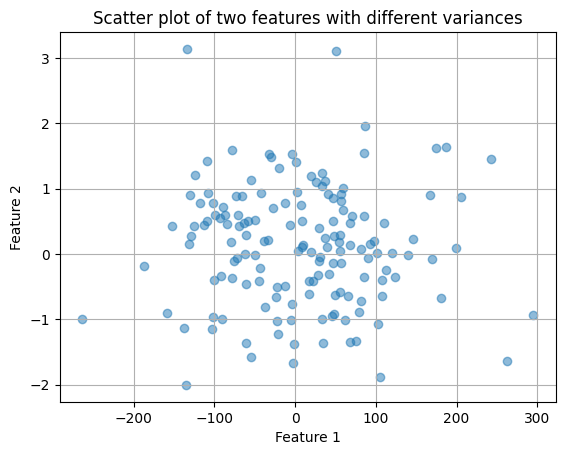

In [ ]:
# Visualize the distribution of the first two features
plt.scatter(X[:, 0], X[:, 3], alpha=0.5)
plt.title('Scatter plot of two features with different variances')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

### Correlation and Covariance

Which one is better to use in this case?

The sample **covariance** between two variables (X, Y) is calculated using the following formula:
$$
\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$


---



The sample **correlation** coefficient r between two variables (X, Y), a.k.a. Pearson's correlation coefficient, is calculated using the formula:
$$
r_{XY} = \frac{\text{Cov}(X, Y)}{s_X s_Y}
$$
Since sample standard deviation is $ s_X = \sqrt{\frac{\sum_{i=1}^{n} (X_i - \bar{X})^2}{n-1}} $, we substitute to get the formula
$$
r_{XY} = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$

#### Covariance Matrix:
$$
\Sigma = \begin{bmatrix}
\text{Cov}(X_1, X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_p) \\
\text{Cov}(X_2, X_1) & \text{Cov}(X_2, X_2) & \cdots & \text{Cov}(X_2, X_p) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_p, X_1) & \text{Cov}(X_p, X_2) & \cdots & \text{Cov}(X_p, X_p)
\end{bmatrix}
$$


In [ ]:
# Compute covariance matrix
cov_matrix = np.cov(X, rowvar=False)  # rowvar=False indicates variables are columns

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[8847.46 1196.43  -20.13   -2.66   -7.03   -1.33]
 [1196.43 9947.57    1.26    6.88   -1.3    -8.91]
 [ -20.13    1.26    0.98   -0.04   -0.12   -0.06]
 [  -2.66    6.88   -0.04    0.83    0.01   -0.04]
 [  -7.03   -1.3    -0.12    0.01    1.1     0.02]
 [  -1.33   -8.91   -0.06   -0.04    0.02    0.88]]


The high variance variables have disproportionately large covariances.

#### Correlation Matrix:
$$
R = \begin{bmatrix}
1 & r_{X_1 X_2} & \cdots & r_{X_1 X_p} \\
r_{X_2 X_1} & 1 & \cdots & r_{X_2 X_p} \\
\vdots & \vdots & \ddots & \vdots \\
r_{X_p X_1} & r_{X_p X_2} & \cdots & 1
\end{bmatrix}
$$

In [ ]:
# Compute correlation matrix
cor_matrix = np.corrcoef(X, rowvar=False)

print("\nCorrelation Matrix:")
print(cor_matrix)


Correlation Matrix:
[[ 1.    0.13 -0.22 -0.03 -0.07 -0.02]
 [ 0.13  1.    0.01  0.08 -0.01 -0.1 ]
 [-0.22  0.01  1.   -0.04 -0.12 -0.06]
 [-0.03  0.08 -0.04  1.    0.01 -0.05]
 [-0.07 -0.01 -0.12  0.01  1.    0.02]
 [-0.02 -0.1  -0.06 -0.05  0.02  1.  ]]


The correlation matrices give better insights about the relationship between the variables, as dividing theis by standard deviations is a form of normalization, resulting in values between [-1, 1], regardless of the scale of the original variables.

### PCA Using Covariance

#### Eigenvalues, Eigenvectors

In [ ]:
eigenvalues_cov, eigenvectors_cov = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues_cov)
print("\nEigenvectors:\n", eigenvectors_cov)


Eigenvalues:
 [10714.35  8080.75     1.18     0.77     0.9      0.88]

Eigenvectors:
 [[ 0.54  0.84 -0.   -0.    0.    0.  ]
 [ 0.84 -0.54  0.    0.   -0.    0.  ]
 [-0.   -0.   -0.5  -0.5   0.46  0.53]
 [ 0.   -0.    0.06 -0.7   0.11 -0.7 ]
 [-0.   -0.    0.85 -0.16  0.4   0.3 ]
 [-0.    0.    0.15 -0.48 -0.78  0.37]]


Eigenvalues represent the amount of variance captured by each principal component. Sorting them in descending order allows prioritizing the principal components that explain the most variance in the dataset.

In [ ]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues_cov)[::-1]
eigenvalues_cov = eigenvalues_cov[sorted_indices]
eigenvectors_cov = eigenvectors_cov[:, sorted_indices]

In [ ]:
# Project original data onto principal components

num_components = 3
principal_components_cov = eigenvectors_cov[:, :num_components]
print("Principal Components (eigenvectors):\n", principal_components_cov)

# Project X onto principal components
X_pca_cov = np.dot(X, principal_components_cov)

# Print results
print("\nOriginal Shape of X:", X.shape)
print("Shape of X after PCA:", X_pca_cov.shape)
print("X after PCA, first 5 samples:")
print(X_pca_cov[0:5])

Principal Components (eigenvectors):
 [[ 0.54  0.84 -0.  ]
 [ 0.84 -0.54  0.  ]
 [-0.   -0.   -0.5 ]
 [ 0.   -0.    0.06]
 [-0.   -0.    0.85]
 [-0.    0.    0.15]]

Original Shape of X: (150, 6)
Shape of X after PCA: (150, 3)
X after PCA, first 5 samples:
[[ -24.06  -70.31   -1.74]
 [ -52.37  -31.36    1.13]
 [ 203.16   68.57    0.43]
 [  -0.27 -154.19   -1.03]
 [ -52.89  130.28    0.64]]


Find how much variance in the data is retained by each principal component

In [ ]:
explained_variance_cov = eigenvalues_cov / np.sum(eigenvalues_cov)
print("\nExplained Variance Ratio:", explained_variance_cov)


Explained Variance Ratio: [0.57 0.43 0.   0.   0.   0.  ]


As evident, the Principal components with zero variance (0.00) indicate that they do not contribute any additional variance, reflecting variables with very low variability.

Due to their lower scale in comparison with the other features, these variables are considered 'flat' constants, which is not the case in reality.  In PCA, these components are disregarded.

### PCA Using Correlation

In [ ]:
eigenvalues_cor, eigenvectors_cor = np.linalg.eig(cor_matrix)
print("\nEigenvalues:\n", eigenvalues_cor)
print("\nEigenvectors:\n", eigenvectors_cor)


Eigenvalues:
 [0.68 1.25 1.17 1.06 0.89 0.95]

Eigenvectors:
 [[ 0.63 -0.68 -0.02  0.37  0.07 -0.02]
 [-0.29 -0.38 -0.51 -0.11 -0.68 -0.16]
 [ 0.6   0.61 -0.42  0.12 -0.28 -0.06]
 [ 0.21 -0.14 -0.27 -0.62  0.12  0.68]
 [ 0.34 -0.06  0.4  -0.65 -0.19 -0.51]
 [ 0.06  0.06  0.57  0.18 -0.63  0.49]]


In [ ]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues_cor)[::-1]
eigenvalues_cor = eigenvalues_cor[sorted_indices]
eigenvectors_cor = eigenvectors_cor[:, sorted_indices]

In [ ]:
# Project original data onto principal components

num_components = 3
principal_components_cor = eigenvectors_cor[:, :num_components]
print("Principal Components (eigenvectors):\n", principal_components_cor)

# Project X onto principal components
X_pca_cor = np.dot(X, principal_components_cor)

# Print results
print("\nOriginal Shape of X:", X.shape)
print("Shape of X after PCA:", X_pca_cor.shape)
print("X after PCA, first 5 samples:")
print(X_pca_cor[0:5])

Principal Components (eigenvectors):
 [[-0.68 -0.02  0.37]
 [-0.38 -0.51 -0.11]
 [ 0.61 -0.42  0.12]
 [-0.14 -0.27 -0.62]
 [-0.06  0.4  -0.65]
 [ 0.06  0.57  0.18]]

Original Shape of X: (150, 6)
Shape of X after PCA: (150, 3)
X after PCA, first 5 samples:
[[  43.62   -9.39  -28.28]
 [  46.6    16.8   -16.81]
 [-165.48  -72.47   47.74]
 [  58.09  -41.27  -57.5 ]
 [ -13.28   57.69   42.5 ]]


In [ ]:
explained_variance_cor = eigenvalues_cor / np.sum(eigenvalues_cor)
print("\nExplained Variance Ratio:", explained_variance_cor)


Explained Variance Ratio: [0.21 0.2  0.18 0.16 0.15 0.11]


As evident, the principal components formed using correlation coefficients all contribute more equally, which makes more sense, since the original dataset feature values were randomly generated.

### Comparing Covariance-based & Correlation-based PCA

Cumulative Explained Variance (Covariance-based PCA):
[0.57 1.   1.   1.   1.   1.  ]

Cumulative Explained Variance (Correlation-based PCA):
[0.21 0.4  0.58 0.74 0.89 1.  ]


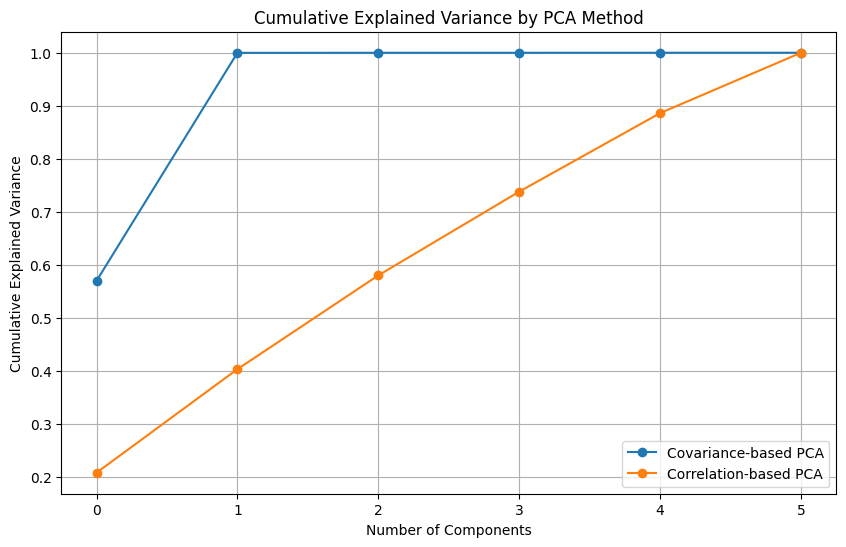

In [ ]:
# Calculate cumulative explained variance
cumulative_variance_cov = np.cumsum(explained_variance_cov)
cumulative_variance_cor = np.cumsum(explained_variance_cor)

print("Cumulative Explained Variance (Covariance-based PCA):")
print(cumulative_variance_cov)
print("\nCumulative Explained Variance (Correlation-based PCA):")
print(cumulative_variance_cor)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_cov, label='Covariance-based PCA', marker='o')
plt.plot(cumulative_variance_cor, label='Correlation-based PCA', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Method')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
sorted_eigenvalues = eigenvalues_cov
sorted_eigenvectors = eigenvectors_cov

total_variance = np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(sorted_eigenvalues) / total_variance

# Find the number of components that retain at least 80% of the variance
num_components = np.argmax(cumulative_explained_variance >= 0.80) + 1

# Print the cumulative explained variance for each component
print("Cumulative Explained Variance:", cumulative_explained_variance)
print("Number of Components to retain 80% variance:", num_components)

# Select the principal components
principal_components_cor = sorted_eigenvectors[:, :num_components]
print("Principal Components (eigenvectors):\n", principal_components_cor)

# Project X onto principal components
X_pca_cor = np.dot(X, principal_components_cor)

Cumulative Explained Variance: [0.57 1.   1.   1.   1.   1.  ]
Number of Components to retain 80% variance: 2
Principal Components (eigenvectors):
 [[ 0.54  0.84]
 [ 0.84 -0.54]
 [-0.   -0.  ]
 [ 0.   -0.  ]
 [-0.   -0.  ]
 [-0.    0.  ]]


In [ ]:
sorted_eigenvalues = eigenvalues_cor
sorted_eigenvectors = eigenvectors_cor

total_variance = np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(sorted_eigenvalues) / total_variance

# Find the number of components that retain at least 80% of the variance
num_components = np.argmax(cumulative_explained_variance >= 0.80) + 1

# Print the cumulative explained variance for each component
print("Cumulative Explained Variance:", cumulative_explained_variance)
print("Number of Components to retain 80% variance:", num_components)

# Select the principal components
principal_components_cor = sorted_eigenvectors[:, :num_components]
print("Principal Components (eigenvectors):\n", principal_components_cor)

# Project X onto principal components
X_pca_cor = np.dot(X, principal_components_cor)

Cumulative Explained Variance: [0.21 0.4  0.58 0.74 0.89 1.  ]
Number of Components to retain 80% variance: 5
Principal Components (eigenvectors):
 [[-0.68 -0.02  0.37 -0.02  0.07]
 [-0.38 -0.51 -0.11 -0.16 -0.68]
 [ 0.61 -0.42  0.12 -0.06 -0.28]
 [-0.14 -0.27 -0.62  0.68  0.12]
 [-0.06  0.4  -0.65 -0.51 -0.19]
 [ 0.06  0.57  0.18  0.49 -0.63]]


###

### Conclusion

Higher cumulative explained variance for the same number of components indicates that the method retains more information.

**The results** show covariance-based PCA outperforms correlation-based PCA which is contrary to what I expected and tried to prove.

## Linear Discriminant Analysis
Linear discriminant analysis (LDA) is also known as Fisher's linear discriminant or mapping (FLD). Unlike PCA, LDA is a supervised method, i.e. it requires labelled data. The goal of LDA is to reduce the dimensionality to 1-D. The objective of LDA is to find a linear mapping where the projected observations are well separated, maximizing linear class separability [1].

We look to achieve the separation of the means for the classes, relative to  scatter as a measure of the standard deviations for the classes. LDA is the
linear mapping with the maximum ratio of between-class scatter to
within-class scatter [1].

### Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/My Drive/datasets'

Mounted at /content/drive
/content/drive/My Drive/datasets


In [21]:
file = 'IRIS.csv'
iris = pd.read_csv(file)

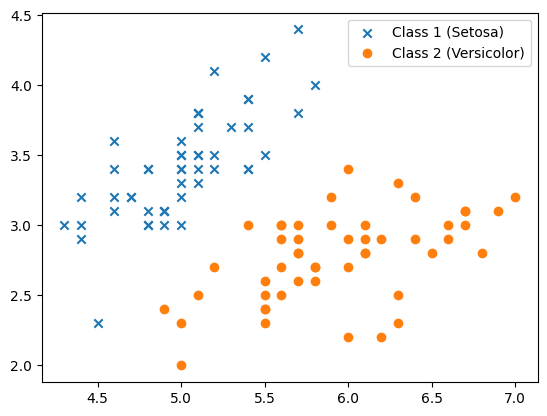

LDA vector w: [ 0.06600043  0.42695115 -0.49229259 -0.75564851]


In [22]:
# Convert string labels to numbers
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris.iloc[:, -1] = iris.iloc[:, -1].map(label_mapping)

# Select two classes for LDA, for example, Setosa (0) and Versicolor (1)
class_labels = iris.iloc[:, -1]
dat1 = iris[class_labels == 0].iloc[:, :-1].values
dat2 = iris[class_labels == 1].iloc[:, :-1].values

# Sample sizes
n1 = dat1.shape[0]
n2 = dat2.shape[0]

# Plot the data (first two features)
plt.scatter(dat1[:, 0], dat1[:, 1], marker='x', label='Class 1 (Setosa)')
plt.scatter(dat2[:, 0], dat2[:, 1], marker='o', label='Class 2 (Versicolor)')
plt.legend()
plt.show()

# Calculate the scatter matrices
scat1 = (n1 - 1) * np.cov(dat1, rowvar=False)
scat2 = (n2 - 1) * np.cov(dat2, rowvar=False)

# Compute the within-class scatter matrix
Sw = scat1 + scat2

# Calculate the means for each class
mu1 = np.mean(dat1, axis=0)
mu2 = np.mean(dat2, axis=0)

# Calculate the LDA vector w
w = np.linalg.inv(Sw).dot(mu1 - mu2)

# Normalize the vector w
w = w / np.linalg.norm(w)

print(f"LDA vector w: {w}")

## To be continued

Algorithm not finished yet.

## References
[1]. Martinez, W.L., Martinez, A.R., & Solka, J. (2017). Exploratory Data Analysis with MATLAB (3rd ed.). Chapman and Hall/CRC. https://doi.org/10.1201/9781315366968